In [128]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 21.9 MB/s eta 0:00:0031m23.4 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━ 7.4/8.6 MB 24.9 MB/s eta 0:00:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 14.8 MB/s eta 0:00:00


## Importing libraries

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

# Stage 1. DATA ACQUISITION

## Daily Case Data

In [3]:
daily_new_cases_cook_county = pd.read_csv(os.path.join("..","data","daily_new_cases_cook_county.csv"))
daily_new_cases_cook_county['date'] = pd.to_datetime(daily_new_cases_cook_county['date'])
daily_new_cases_cook_county.head()

date  confirmed_cases mask_required  cases
0 2020-01-23                0            No      0
1 2020-01-24                1            No      1
2 2020-01-25                1            No      0
3 2020-01-26                1            No      0
4 2020-01-27                1            No      0

## Daily Travel Data

In [4]:
trips_by_distance_all = pd.read_csv(os.path.join("..","data","raw","Trips_by_Distance.csv"))
## From previous analysis we know that Cook county FIPS is 17031.0, we filter on it
trips_by_distance_cook = trips_by_distance_all[trips_by_distance_all["County FIPS"]==17031.0]
trips_by_distance_cook['Date'] = pd.to_datetime(trips_by_distance_cook['Date'])
trips_by_distance_cook.head()

/var/folders/qg/w9c0ll710y55hfpbqgzd50h00000gn/T/ipykernel_65470/395050458.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_by_distance_cook['Date'] = pd.to_datetime(trips_by_distance_cook['Date'])


Level       Date  State FIPS State Postal Code  County FIPS  \
48725  County 2019-01-01        17.0                IL      17031.0   
49939  County 2019-01-02        17.0                IL      17031.0   
53072  County 2019-01-03        17.0                IL      17031.0   
56753  County 2019-01-04        17.0                IL      17031.0   
61233  County 2019-01-05        17.0                IL      17031.0   

       County Name  Population Staying at Home  \
48725  Cook County                   1396803.0   
49939  Cook County                   1113847.0   
53072  Cook County                   1130134.0   
56753  Cook County                   1100928.0   
61233  Cook County                   1141428.0   

       Population Not Staying at Home  Number of Trips  Number of Trips <1  \
48725                       3753430.0       15198911.0           4832245.0   
49939                       4036386.0       19223606.0           5761425.0   
53072                       4020099.0       19640570.0           5829954.0   
56753                       4049305.0       19961918.0           5853756.0   
61233                       4008805.0       20239858.0           6050570.0   

       ...  Number of Trips 5-10  Number of Trips 10-25  \
48725  ...             2048283.0              1967193.0   
49939  ...             2793768.0              2764012.0   
53072  ...             2943410.0              2765745.0   
56753  ...             3045365.0              2823805.0   
61233  ...             2995651.0              2639569.0   

       Number of Trips 25-50  Number of Trips 50-100  Number of Trips 100-250  \
48725               611265.0                120727.0                 110623.0   
49939               748106.0                120925.0                 113753.0   
53072               735533.0                119774.0                 117008.0   
56753               734956.0                120149.0                 122384.0   
61233               704066.0                131182.0                 120787.0   

       Number of Trips 250-500  Number of Trips >=500             Row ID  \
48725                  33141.0                30570.0  17-17031-20190101   
49939                  33345.0                27671.0  17-17031-20190102   
53072                  36312.0                29032.0  17-17031-20190103   
56753                  35505.0                29028.0  17-17031-20190104   
61233                  34039.0                25696.0  17-17031-20190105   

       Week Month  
48725     0     1  
49939     0     1  
53072     0     1  
56753     0     1  
61233     0     1  

[5 rows x 22 columns]

In [5]:
trips_by_distance_cook.describe()

State FIPS  County FIPS  Population Staying at Home  \
count      1132.0       1132.0                1.132000e+03   
mean         17.0      17031.0                1.282996e+06   
std           0.0          0.0                1.740140e+05   
min          17.0      17031.0                9.183670e+05   
25%          17.0      17031.0                1.155891e+06   
50%          17.0      17031.0                1.227049e+06   
75%          17.0      17031.0                1.375684e+06   
max          17.0      17031.0                1.983617e+06   

       Population Not Staying at Home  Number of Trips  Number of Trips <1  \
count                    1.132000e+03     1.132000e+03        1.132000e+03   
mean                     3.867237e+06     1.994936e+07        6.079198e+06   
std                      1.740140e+05     3.256124e+06        1.199869e+06   
min                      3.166616e+06     9.104497e+06        2.129937e+06   
25%                      3.774548e+06     1.738552e+07        5.130426e+06   
50%                      3.923184e+06     1.996636e+07        6.050697e+06   
75%                      3.994342e+06     2.207706e+07        6.852117e+06   
max                      4.231866e+06     2.927696e+07        9.296468e+06   

       Number of Trips 1-3  Number of Trips 3-5  Number of Trips 5-10  \
count         1.132000e+03         1.132000e+03          1.132000e+03   
mean          4.754306e+06         2.364831e+06          2.952004e+06   
std           7.411050e+05         4.518137e+05          6.245096e+05   
min           2.299198e+06         1.117557e+06          1.378707e+06   
25%           4.211752e+06         2.039579e+06          2.483508e+06   
50%           4.736926e+06         2.286812e+06          2.848758e+06   
75%           5.175509e+06         2.656584e+06          3.358816e+06   
max           7.334411e+06         3.940330e+06          4.534208e+06   

       Number of Trips 10-25  Number of Trips 25-50  Number of Trips 50-100  \
count           1.132000e+03           1.132000e+03             1132.000000   
mean            2.755227e+06           7.317550e+05           144904.425795   
std             5.529194e+05           9.693666e+04            28586.251124   
min             1.248386e+06           3.554530e+05            70847.000000   
25%             2.382228e+06           6.766958e+05           125502.500000   
50%             2.664390e+06           7.355060e+05           145001.000000   
75%             3.055121e+06           7.902012e+05           163597.250000   
max             4.273767e+06           1.072374e+06           240950.000000   

       Number of Trips 100-250  Number of Trips 250-500  \
count              1132.000000              1132.000000   
mean             101618.972615             34828.121908   
std               24891.222034              9676.280303   
min               40837.000000             13074.000000   
25%               85397.250000             27624.000000   
50%              100654.000000             34266.000000   
75%              117987.500000             41969.250000   
max              191760.000000             71587.000000   

       Number of Trips >=500         Week        Month  
count            1132.000000  1132.000000  1132.000000  
mean            30681.595406    25.334806     6.350707  
std             13307.709951    15.385127     3.524798  
min              6792.000000     0.000000     1.000000  
25%             21820.750000    12.000000     3.000000  
50%             29803.000000    25.000000     6.000000  
75%             37193.000000    39.000000     9.000000  
max            118443.000000    52.000000    12.000000

1. We have 1132 days of data, i.e. approximately 3 years and 1 month (Jan 1, 2019 - Feb 5, 2022)

## Covid cases datasets combined with daily travel data

In [6]:
df_combined = pd.merge(trips_by_distance_cook, daily_new_cases_cook_county, how = 'left', left_on = "Date", right_on= "date")
df_combined.head()

Level       Date  State FIPS State Postal Code  County FIPS  County Name  \
0  County 2019-01-01        17.0                IL      17031.0  Cook County   
1  County 2019-01-02        17.0                IL      17031.0  Cook County   
2  County 2019-01-03        17.0                IL      17031.0  Cook County   
3  County 2019-01-04        17.0                IL      17031.0  Cook County   
4  County 2019-01-05        17.0                IL      17031.0  Cook County   

   Population Staying at Home  Population Not Staying at Home  \
0                   1396803.0                       3753430.0   
1                   1113847.0                       4036386.0   
2                   1130134.0                       4020099.0   
3                   1100928.0                       4049305.0   
4                   1141428.0                       4008805.0   

   Number of Trips  Number of Trips <1  ...  Number of Trips 100-250  \
0       15198911.0           4832245.0  ...                 110623.0   
1       19223606.0           5761425.0  ...                 113753.0   
2       19640570.0           5829954.0  ...                 117008.0   
3       19961918.0           5853756.0  ...                 122384.0   
4       20239858.0           6050570.0  ...                 120787.0   

   Number of Trips 250-500  Number of Trips >=500             Row ID  Week  \
0                  33141.0                30570.0  17-17031-20190101     0   
1                  33345.0                27671.0  17-17031-20190102     0   
2                  36312.0                29032.0  17-17031-20190103     0   
3                  35505.0                29028.0  17-17031-20190104     0   
4                  34039.0                25696.0  17-17031-20190105     0   

   Month  date  confirmed_cases  mask_required cases  
0      1   NaT              NaN            NaN   NaN  
1      1   NaT              NaN            NaN   NaN  
2      1   NaT              NaN            NaN   NaN  
3      1   NaT              NaN            NaN   NaN  
4      1   NaT              NaN            NaN   NaN  

[5 rows x 26 columns]

<AxesSubplot: >

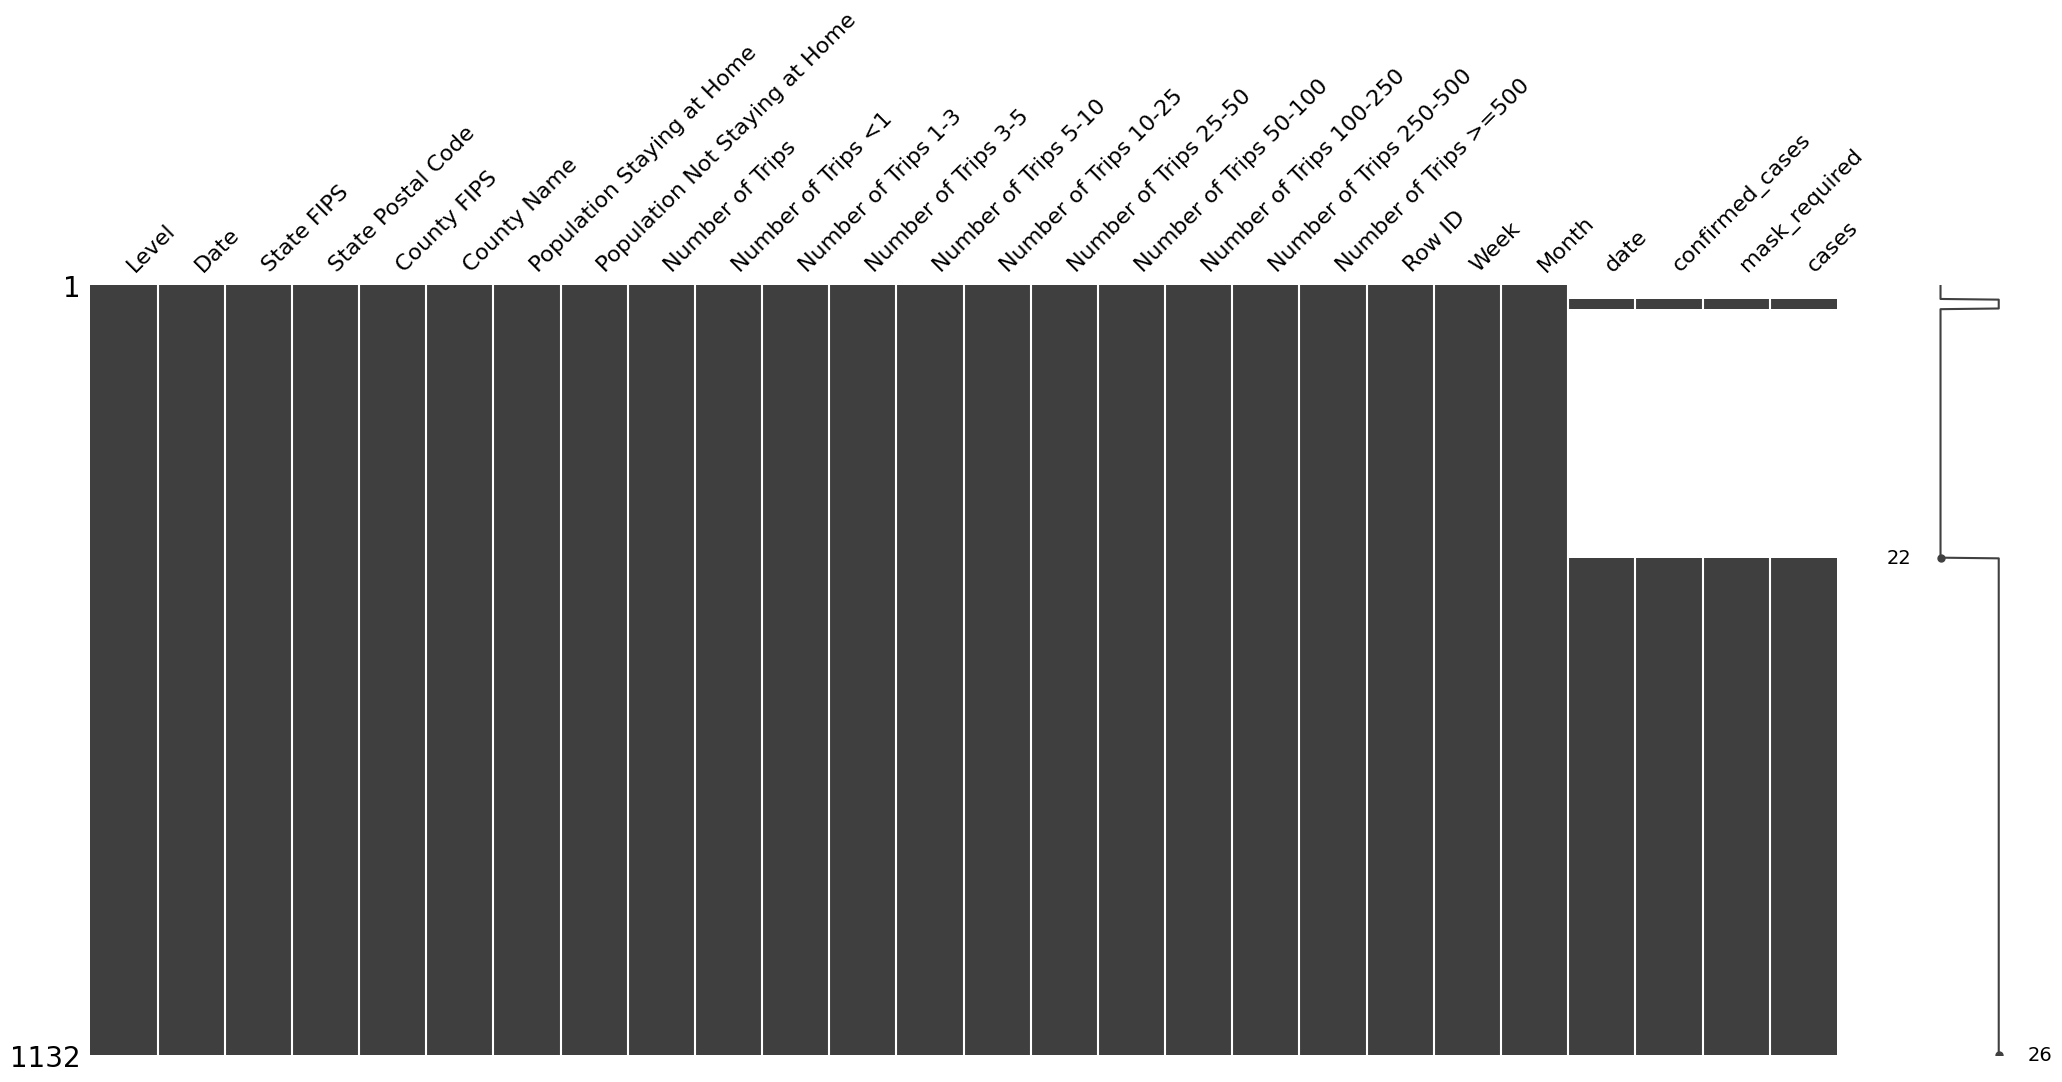

In [7]:
# Plotting missing value distribution using missingno python package
%matplotlib inline
msno.matrix(df_combined)

For some reason, there is some present values in between collection of missing values among the confirmed cases dataset. This is is unlikely because covid cases dataset was practically not collected in 2019. This isn't possible, we will have to inspect what these data points exactly are.

In [8]:
df_combined.isna().sum()

Level                               0
Date                                0
State FIPS                          0
State Postal Code                   0
County FIPS                         0
County Name                         0
Population Staying at Home          0
Population Not Staying at Home      0
Number of Trips                     0
Number of Trips <1                  0
Number of Trips 1-3                 0
Number of Trips 3-5                 0
Number of Trips 5-10                0
Number of Trips 10-25               0
Number of Trips 25-50               0
Number of Trips 50-100              0
Number of Trips 100-250             0
Number of Trips 250-500             0
Number of Trips >=500               0
Row ID                              0
Week                                0
Month                               0
date                              387
confirmed_cases                   387
mask_required                     387
cases                             387
dtype: int64

Observation: 
1. 387 missing values in combined dataset

In [9]:
df_combined.iloc[10:40,:]

Level       Date  State FIPS State Postal Code  County FIPS  County Name  \
10  County 2019-01-11        17.0                IL      17031.0  Cook County   
11  County 2019-01-12        17.0                IL      17031.0  Cook County   
12  County 2019-01-13        17.0                IL      17031.0  Cook County   
13  County 2019-01-14        17.0                IL      17031.0  Cook County   
14  County 2019-01-15        17.0                IL      17031.0  Cook County   
15  County 2019-01-16        17.0                IL      17031.0  Cook County   
16  County 2019-01-17        17.0                IL      17031.0  Cook County   
17  County 2019-01-18        17.0                IL      17031.0  Cook County   
18  County 2019-01-19        17.0                IL      17031.0  Cook County   
19  County 2019-01-20        17.0                IL      17031.0  Cook County   
20  County 2019-01-21        17.0                IL      17031.0  Cook County   
21  County 2021-06-06        17.0                IL      17031.0  Cook County   
22  County 2021-06-07        17.0                IL      17031.0  Cook County   
23  County 2021-06-08        17.0                IL      17031.0  Cook County   
24  County 2021-06-09        17.0                IL      17031.0  Cook County   
25  County 2021-06-10        17.0                IL      17031.0  Cook County   
26  County 2021-06-11        17.0                IL      17031.0  Cook County   
27  County 2021-06-12        17.0                IL      17031.0  Cook County   
28  County 2021-06-13        17.0                IL      17031.0  Cook County   
29  County 2021-06-14        17.0                IL      17031.0  Cook County   
30  County 2021-06-15        17.0                IL      17031.0  Cook County   
31  County 2021-06-16        17.0                IL      17031.0  Cook County   
32  County 2021-06-17        17.0                IL      17031.0  Cook County   
33  County 2021-06-18        17.0                IL      17031.0  Cook County   
34  County 2021-06-19        17.0                IL      17031.0  Cook County   
35  County 2019-01-22        17.0                IL      17031.0  Cook County   
36  County 2019-01-23        17.0                IL      17031.0  Cook County   
37  County 2019-01-24        17.0                IL      17031.0  Cook County   
38  County 2019-01-25        17.0                IL      17031.0  Cook County   
39  County 2019-01-26        17.0                IL      17031.0  Cook County   

    Population Staying at Home  Population Not Staying at Home  \
10                   1099090.0                       4051143.0   
11                   1160327.0                       3989906.0   
12                   1214619.0                       3935614.0   
13                   1142406.0                       4007827.0   
14                   1139800.0                       4010433.0   
15                   1110594.0                       4039639.0   
16                   1112471.0                       4037762.0   
17                   1100340.0                       4049893.0   
18                   1223876.0                       3926357.0   
19                   1224755.0                       3925478.0   
20                   1179739.0                       3970494.0   
21                   1209285.0                       3940948.0   
22                   1162770.0                       3987463.0   
23                   1168611.0                       3981622.0   
24                   1161800.0                       3988433.0   
25                   1151861.0                       3998372.0   
26                   1114625.0                       4035608.0   
27                   1137618.0                       4012615.0   
28                   1211317.0                       3938916.0   
29                   1159807.0                       3990426.0   
30                   1145380.0                       4004853.0   
31                   1159963.0           

For some reason data wasn't sorted by date. Some data (around 14 days from 2021) was placed between 2019 data. We will have to sort this data by date  

In [10]:
df_combined = df_combined[~df_combined["date"].isna()].sort_values( by = ["date"])

In [11]:
df_combined

Level       Date  State FIPS State Postal Code  County FIPS  \
401   County 2020-01-23        17.0                IL      17031.0   
402   County 2020-01-24        17.0                IL      17031.0   
403   County 2020-01-25        17.0                IL      17031.0   
404   County 2020-01-26        17.0                IL      17031.0   
405   County 2020-01-27        17.0                IL      17031.0   
...      ...        ...         ...               ...          ...   
1127  County 2022-02-01        17.0                IL      17031.0   
1128  County 2022-02-02        17.0                IL      17031.0   
1129  County 2022-02-03        17.0                IL      17031.0   
1130  County 2022-02-04        17.0                IL      17031.0   
1131  County 2022-02-05        17.0                IL      17031.0   

      County Name  Population Staying at Home  Population Not Staying at Home  \
401   Cook County                   1127445.0                       4022788.0   
402   Cook County                   1096712.0                       4053521.0   
403   Cook County                   1212883.0                       3937350.0   
404   Cook County                   1300363.0                       3849870.0   
405   Cook County                   1126001.0                       4024232.0   
...           ...                         ...                             ...   
1127  Cook County                   1260686.0                       3889547.0   
1128  Cook County                   1324951.0                       3825282.0   
1129  Cook County                   1267566.0                       3882667.0   
1130  Cook County                   1171911.0                       3978322.0   
1131  Cook County                   1290218.0                       3860015.0   

      Number of Trips  Number of Trips <1  ...  Number of Trips 100-250  \
401        20281936.0           5943300.0  ...                  87719.0   
402        21307310.0           6266951.0  ...                  86057.0   
403        20206153.0           5767858.0  ...                  69413.0   
404        18271991.0           5211833.0  ...                  76036.0   
405        20198031.0           5989904.0  ...                  80247.0   
...               ...                 ...  ...                      ...   
1127       18513638.0           6349279.0  ...                 106632.0   
1128       18291981.0           6354091.0  ...                 113938.0   
1129       18714965.0           6441058.0  ...                 112825.0   
1130       16926740.0           5403315.0  ...                 124670.0   
1131       17241412.0           5436467.0  ...                 119020.0   

      Number of Trips 250-500  Number of Trips >=500             Row ID  Week  \
401                   26100.0                18694.0  17-17031-20200123     3   
402                   24356.0                16560.0  17-17031-20200124     3   
403                   20354.0                17131.0  17-17031-20200125     3   
404                   22882.0                18687.0  17-17031-20200126     4   
405                   23123.0                17494.0  17-17031-20200127     4   
...                       ...                    ...                ...   ...   
1127                  44273.0                34141.0  17-17031-20220201     5   
1128                  47349.0                37037.0  17-17031-20220202     5   
1129                  45596.0                35376.0  17-17031-20220203     5   
1130                  42226.0                36303.0  17-17031-20220204     5   
1131                  40016.0                30960.0  17-17031-20220205     5   

      Month       date  confirmed_cases  mask_required   cases  
401       1 2020-01-23              0.0             No     0.0  
402       1 2020-01-24              1.0             No     1.0  
403       1 2020-01-25              1.0             No     0.0  
404       1 2020-01-26              1.0             No     

<AxesSubplot: >

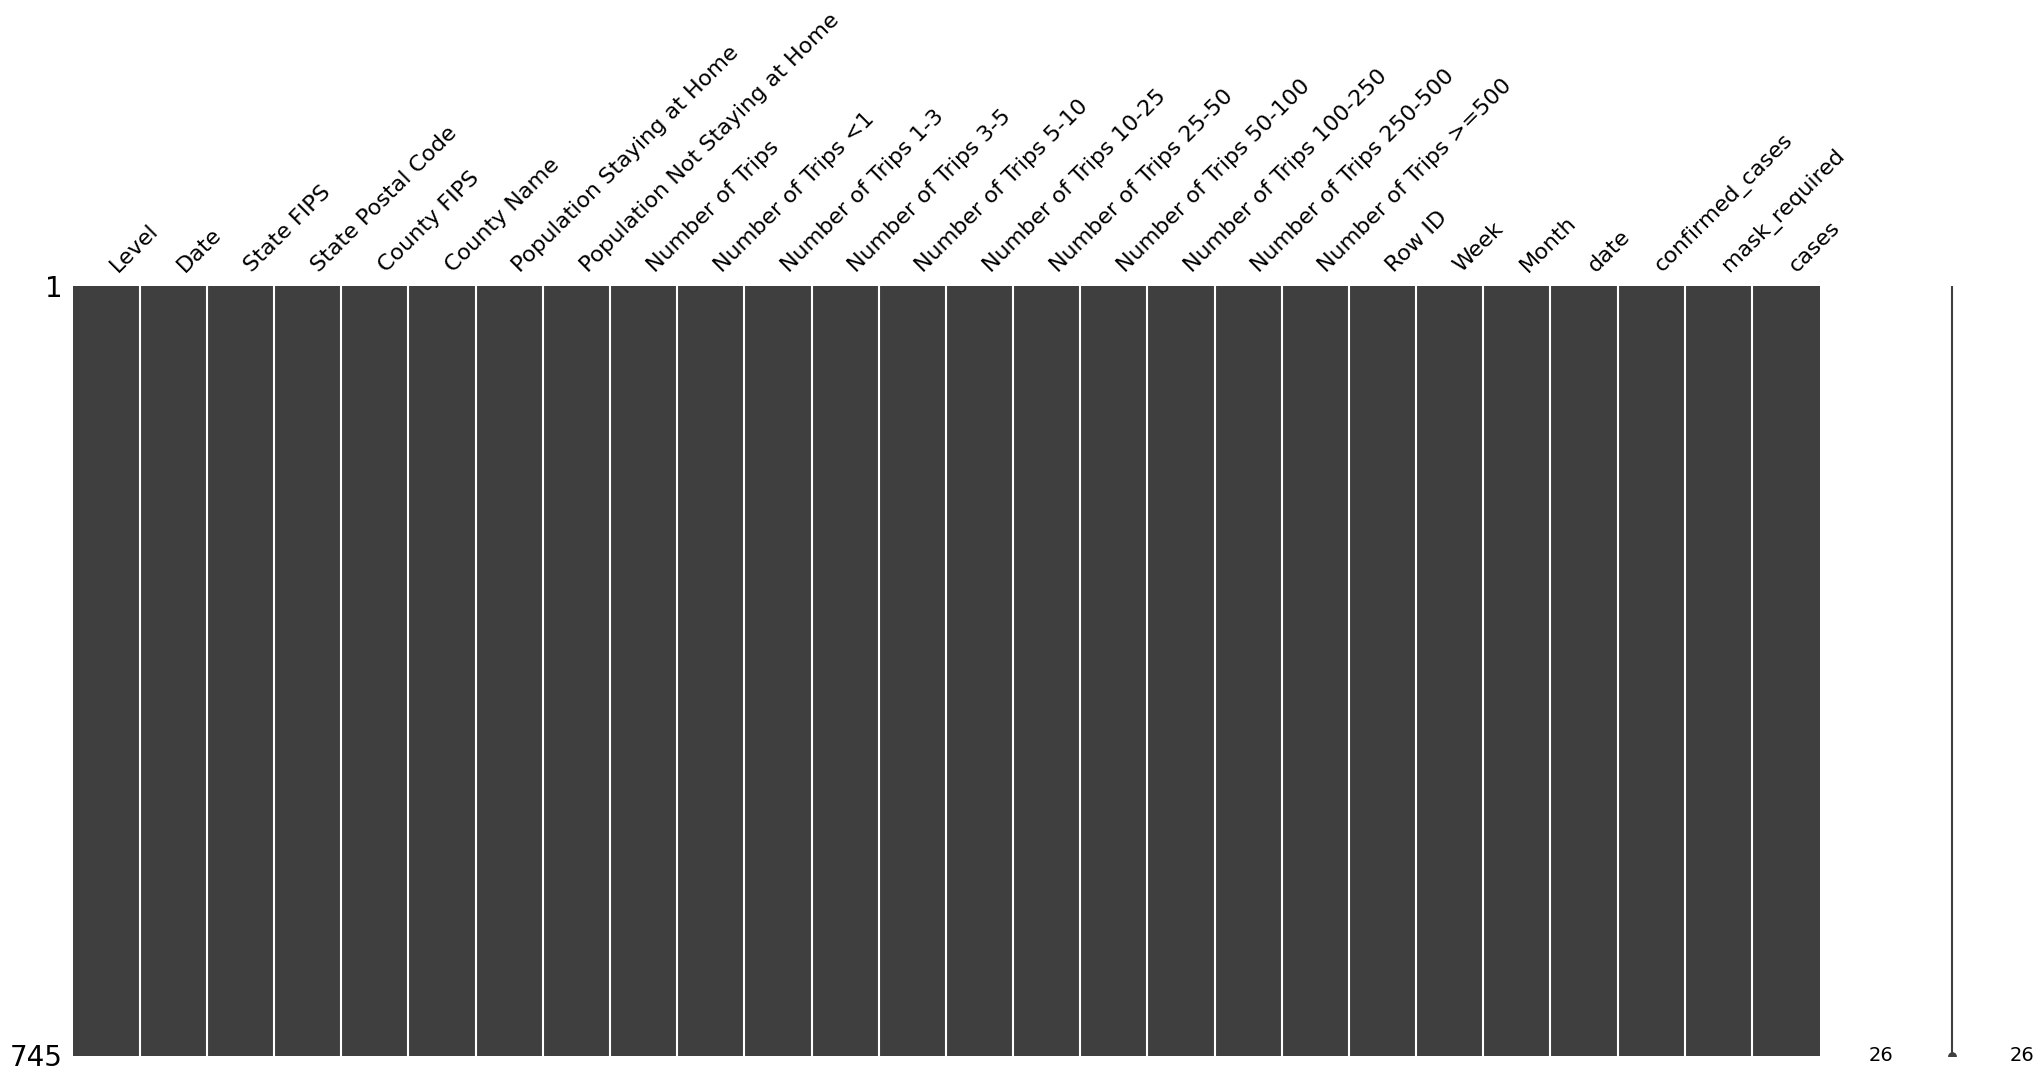

In [12]:
# Checking missing distribution now
msno.matrix(df_combined)

2. We have data for 745 days ( 23 Jan, 2020 - 5 Feb, 2022)

# Stage 2: Analysis 

In [59]:
df_combined.columns

Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month', 'date',
       'confirmed_cases', 'mask_required', 'cases'],
      dtype='object')

In [16]:
df_final = df_combined[[ 'Date', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500','confirmed_cases', 'cases']]

## 1. Visual Analysis

In [17]:
df_final = df_final.set_index('Date')

<AxesSubplot: xlabel='Date'>

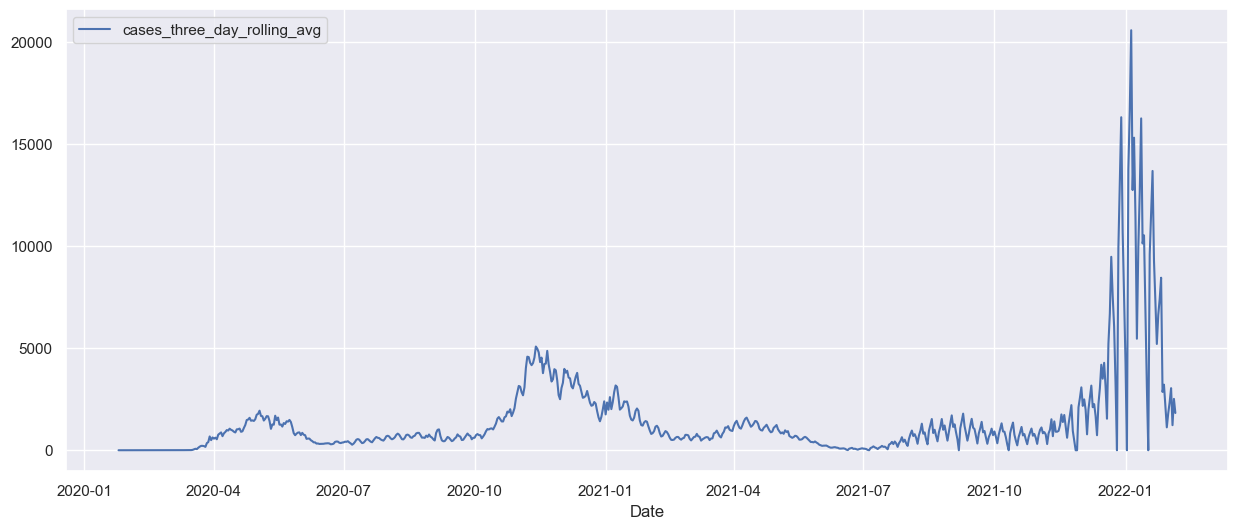

In [18]:
df_final['cases_three_day_rolling_avg'] = df_final['cases'].rolling(3).mean()
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(data=df_final[[ 'cases_three_day_rolling_avg']])

<AxesSubplot: xlabel='Date'>

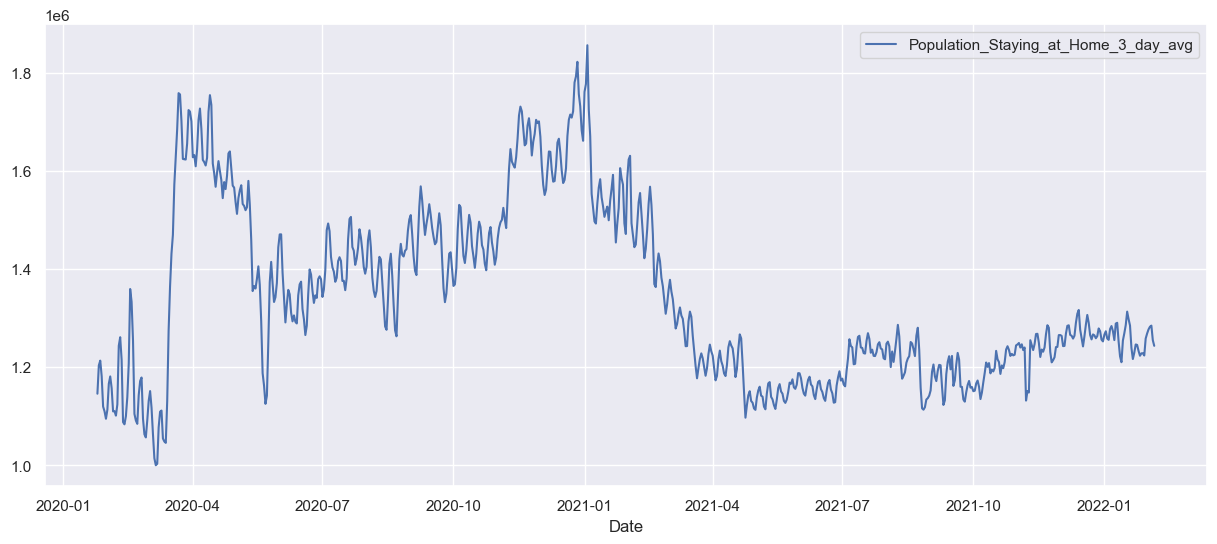

In [19]:
df_final['Population_Staying_at_Home_3_day_avg'] = df_final['Population Staying at Home'].rolling(3).mean()
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(data=df_final[['Population_Staying_at_Home_3_day_avg']])

/Users/amrit/opt/anaconda3/envs/hcds/lib/python3.8/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


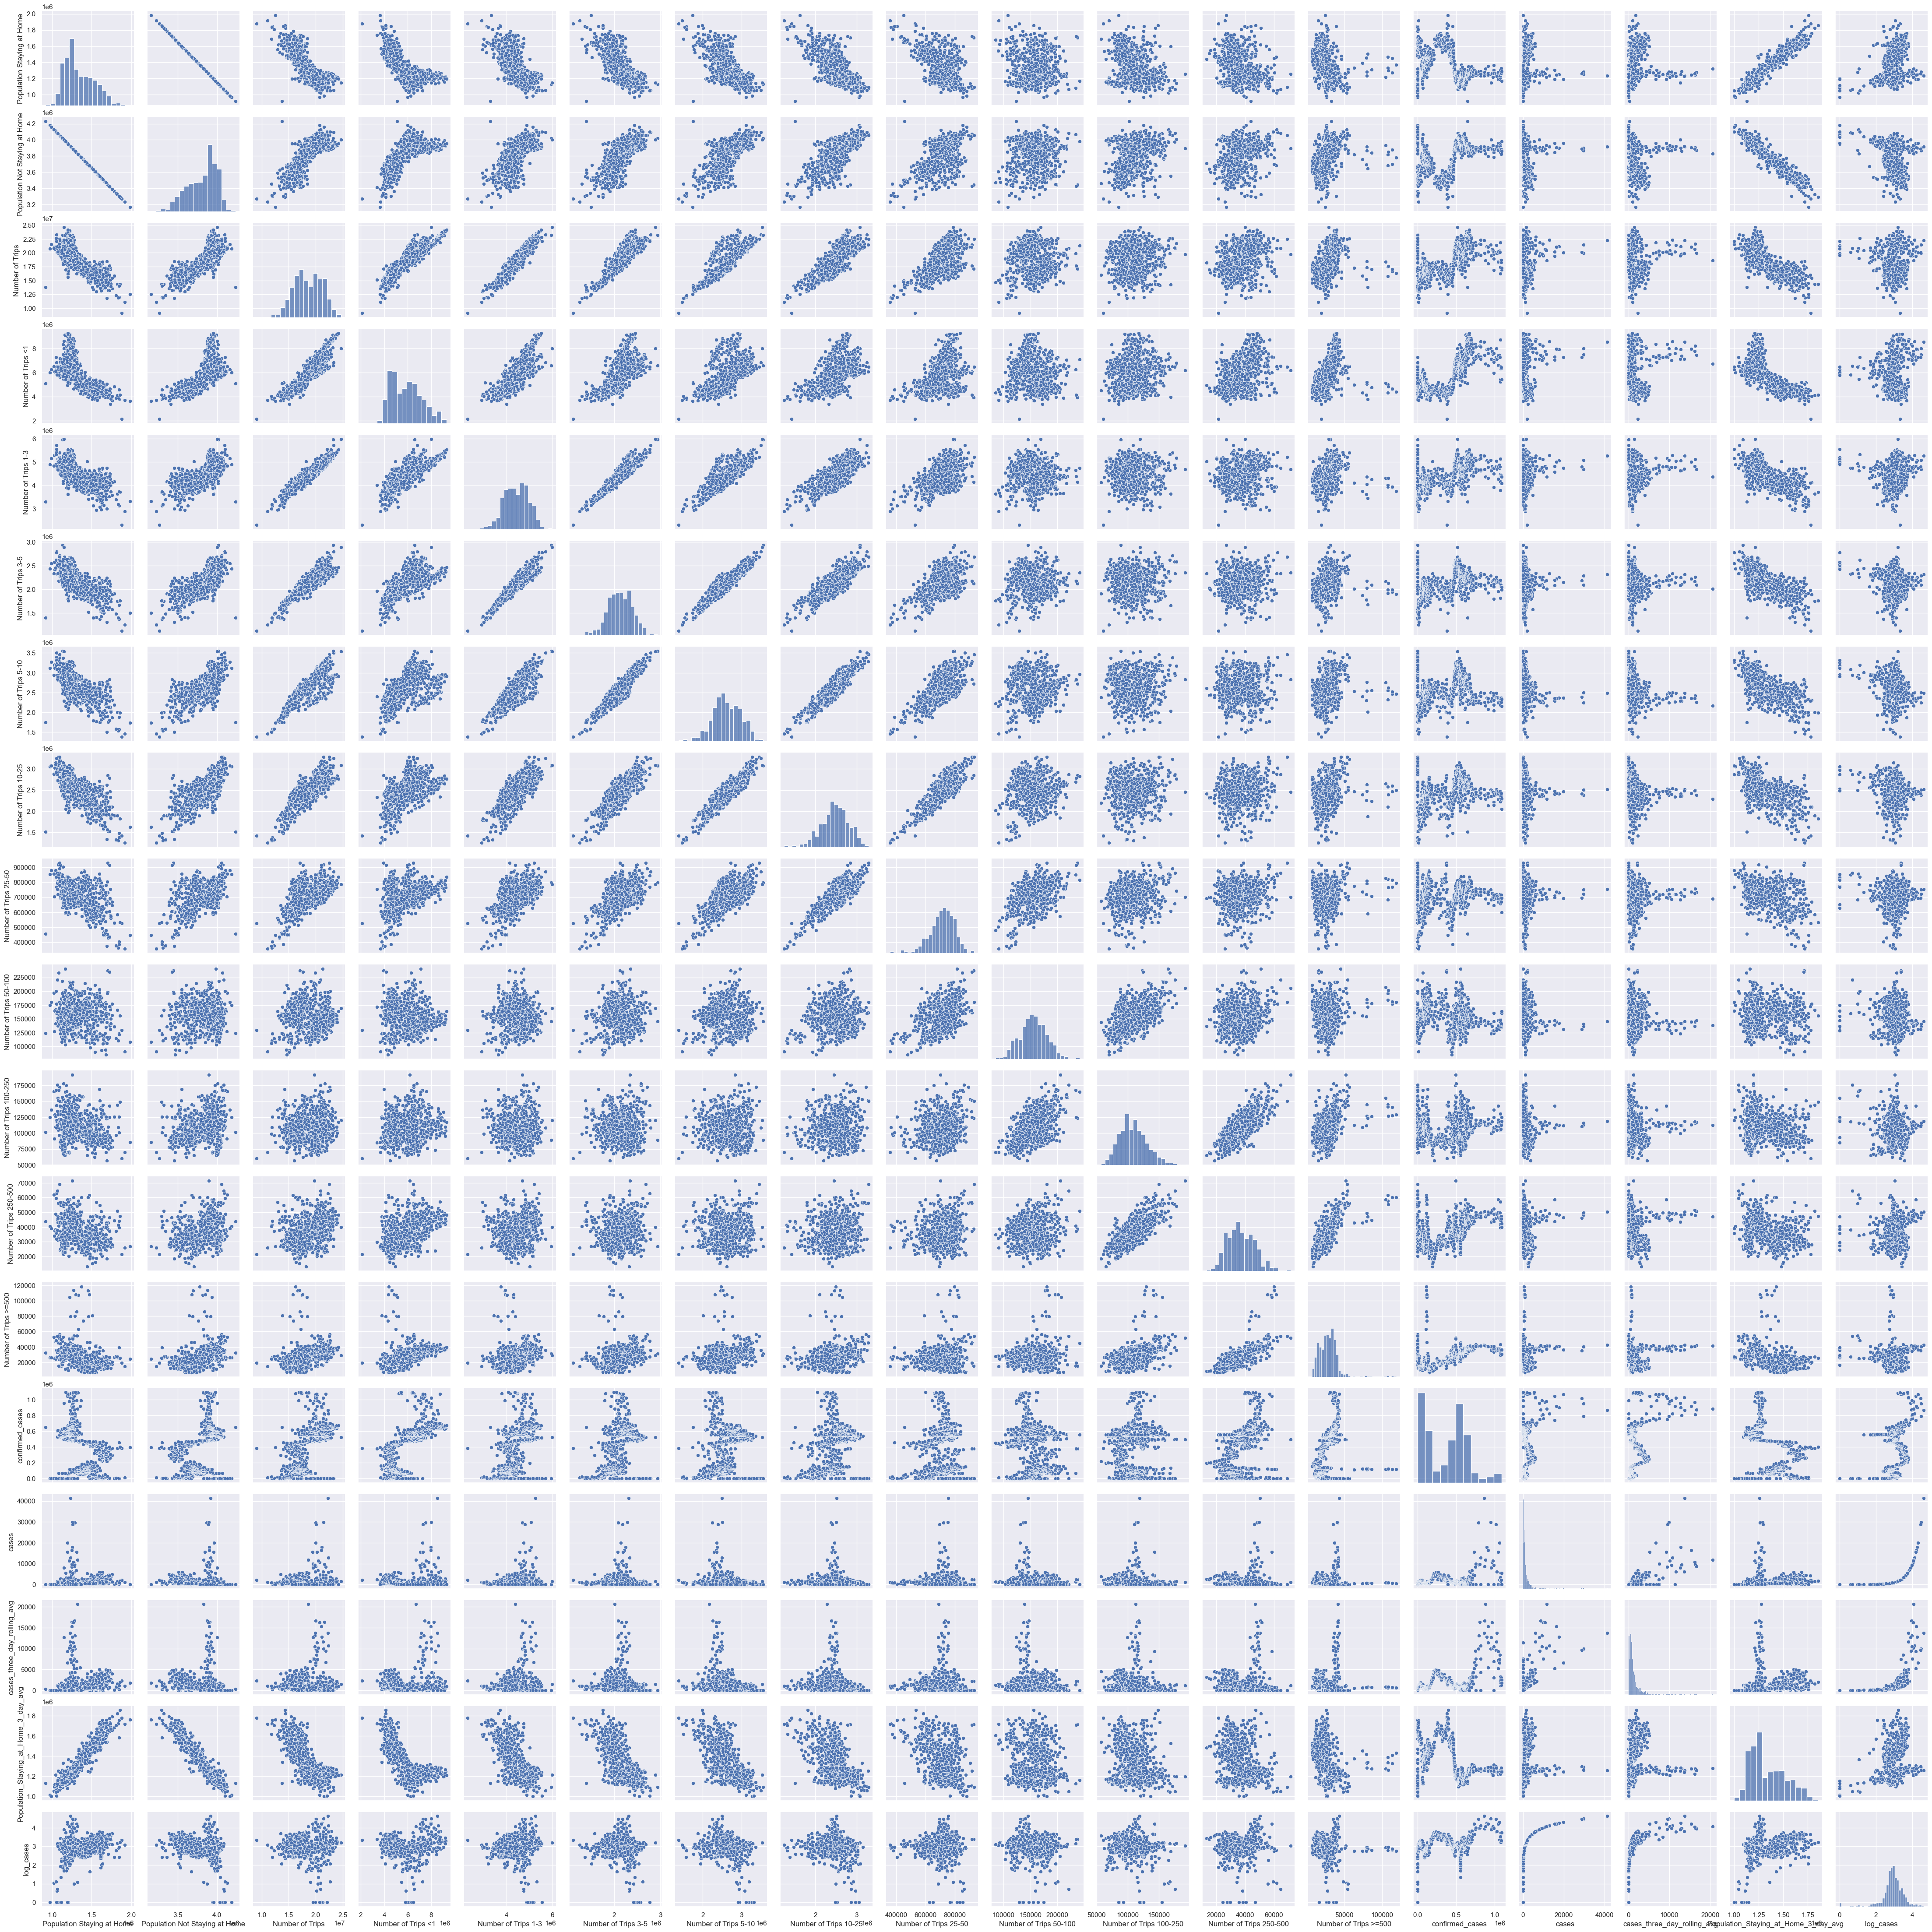

In [20]:
# Pair plot - to visualize bivariate relationships between all variables together
df_final["log_cases"] = np.log10(df_final["cases"])
sns.pairplot(df_final)
plt.show()

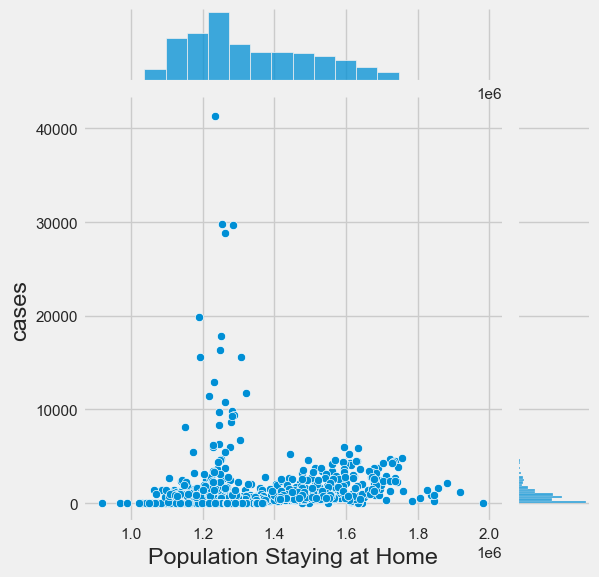

In [124]:
plt.style.use('fivethirtyeight')

sns.jointplot(x='Population Staying at Home', y='cases', data=df_final)
plt.show()

# 2. Correlation 

## Q. Which of the variables are correlated and how are they correlated?

## Why Spearman Correlation? 
- Working with ordinal data (according to 
https://towardsdatascience.com/discover-the-strength-of-monotonic-relation-850d11f72046#:~:text=Spearman's%20rank%20correlation%20requires%20ordinal,%2C%20Neutral%2C%20Disagree%2C%20Strongly%20Disagree)
- Cases data isn't normally distributed

<Figure size 1800x2500 with 0 Axes>

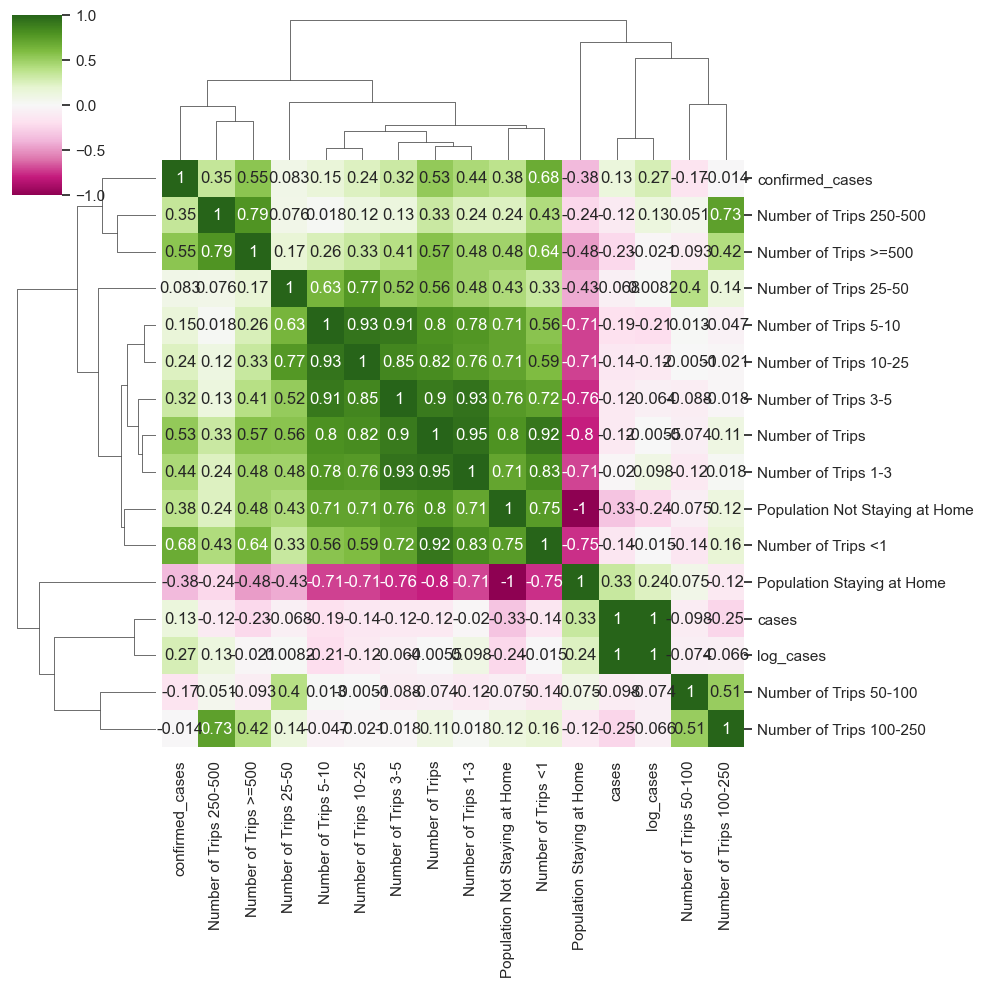

In [100]:
plt.figure(figsize=(18, 25))
heatmap = sns.clustermap(df_final.corr(method='spearman'), vmin=-1, vmax=1, annot=True,cmap="PiYG")
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [114]:
df_final.corr(method='spearman')[['cases']].sort_values(by="cases",ascending = False).iloc[1:,:]

cases
log_cases                       1.000000
Population Staying at Home      0.329317
confirmed_cases                 0.133548
Number of Trips 1-3            -0.020168
Number of Trips 25-50          -0.068448
Number of Trips 50-100         -0.098047
Number of Trips 250-500        -0.116866
Number of Trips 3-5            -0.119181
Number of Trips                -0.121768
Number of Trips 10-25          -0.139805
Number of Trips <1             -0.142372
Number of Trips 5-10           -0.192243
Number of Trips >=500          -0.228445
Number of Trips 100-250        -0.247495
Population Not Staying at Home -0.329317

### Observations
- Population Staying at home is the only variable positively correlated
- Higher number of trips is surprisingly negatively associated with daily COVID cases

# 3. Regression Analysis

0
Feature Name  Population Staying at Home
R Squared                       0.004816
Intercept                     -96.107163
Slope                           0.001163

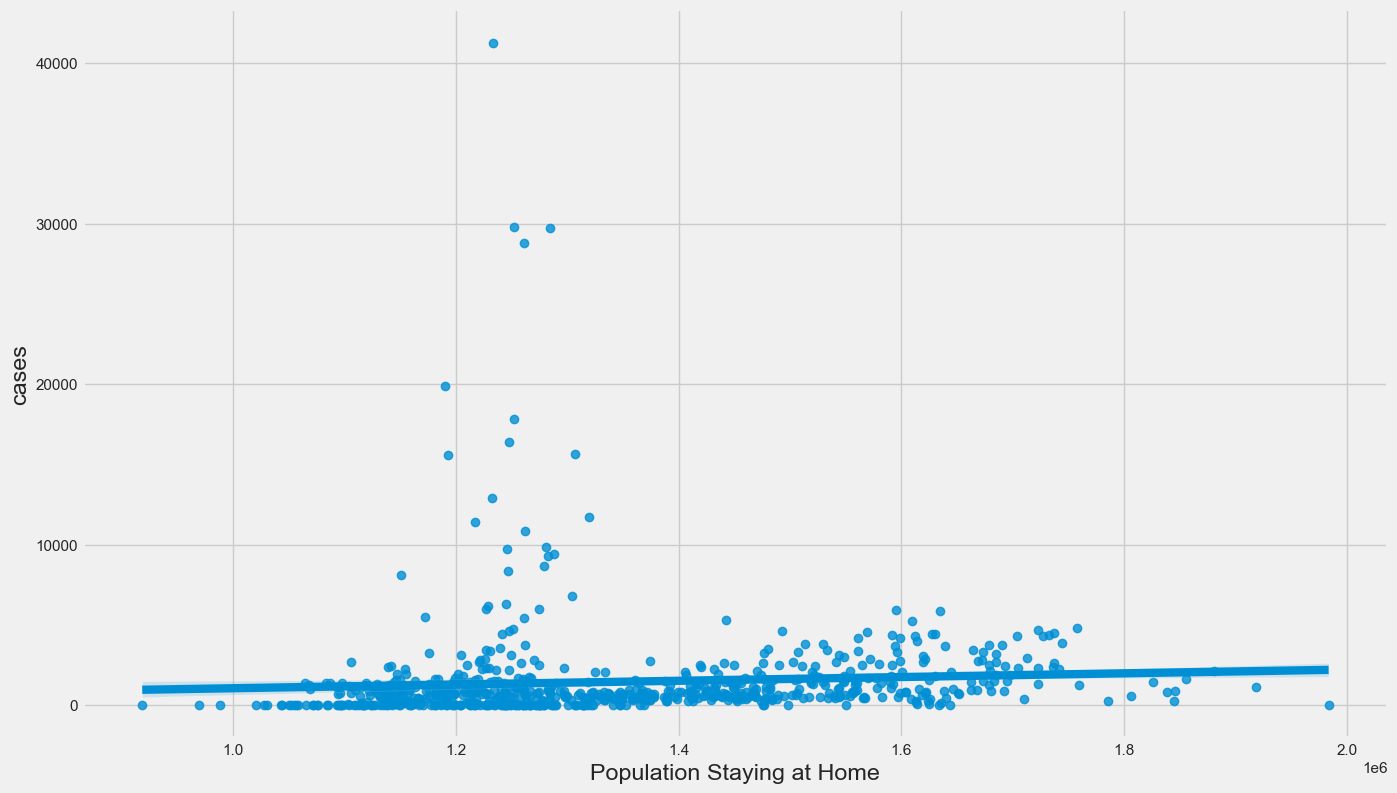

In [139]:
# Build Linear Regression model from sklearn library
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(df_final[['Population Staying at Home']], df_final[['cases']])
# model R-Square
r_sq = model.score(df_final[['Population Staying at Home']], df_final[['cases']])
intercept = model.intercept_[0]
slope = model.coef_[0][0]

sns.regplot(x = df_final[['Population Staying at Home']],y = df_final[['cases']])


model_results = pd.DataFrame(index = ['Feature Name','R Squared','Intercept','Slope'],
                             data = ["Population Staying at Home",r_sq,intercept,slope])
model_results

# References & learnings

## 1. Correlation resource - https://www.youtube.com/watch?v=xZ_z8KWkhXE
### Learning:
1. Correlation doesn't depend on the scale of the data
2. Small dataset is BAD for assessing correlation/association

### Questions
3. Claim made slightly before 9:08 about p-values seems wrong
4. Can we still have a horizontal correlation line and still have correlation 1? (because doesn't correlation mainly refer to the ability to drawing a line through all data points?)

## 2. Correlation Types and When to Use Them - https://ademos.people.uic.edu/Chapter22.html